In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tswift import Song
from langdetect import detect
import pycountry
from sklearn import datasets
from sklearn import metrics
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
db=pd.read_csv('CleanEnglishLyrics.csv')
db.dropna(subset=['testo'], inplace=True)
db.reset_index(inplace=True)
db.drop(['index','Unnamed: 0'],axis=1,inplace=True)

In [3]:
db.head(7)

,testo,valence
0,I put a spell on you\nBecause you're mine\nSto...,0.950
1,"Unfortunately, we are not authorized to show t...",0.209
2,Once I lived the life of a millionaire\nSpent ...,0.211
3,"There ain't nothing I can do, or nothing I can...",0.137
4,Judge you wanna hear my plea\nBefore you open ...,0.601
5,"Tired of bein' lonely, tired of bein' blue\nI ...",0.402
6,"No one to talk with,\nall by myself.\nNo one t...",0.503


In [4]:
languages=[]
for row in range(len(db)):
    lang=detect(db['testo'][row])
    lang=pycountry.languages.get(alpha_2=lang).name.lower()
    languages.append(lang)
db['language']=languages


In [5]:
db['language'].value_counts()

english       32514
portuguese        1
estonian          1
somali            1
afrikaans         1
korean            1
Name: language, dtype: int64

In [6]:
#db_eng=db[db['language']=='english'].copy()
db_eng=pd.read_csv('db_eng.csv')

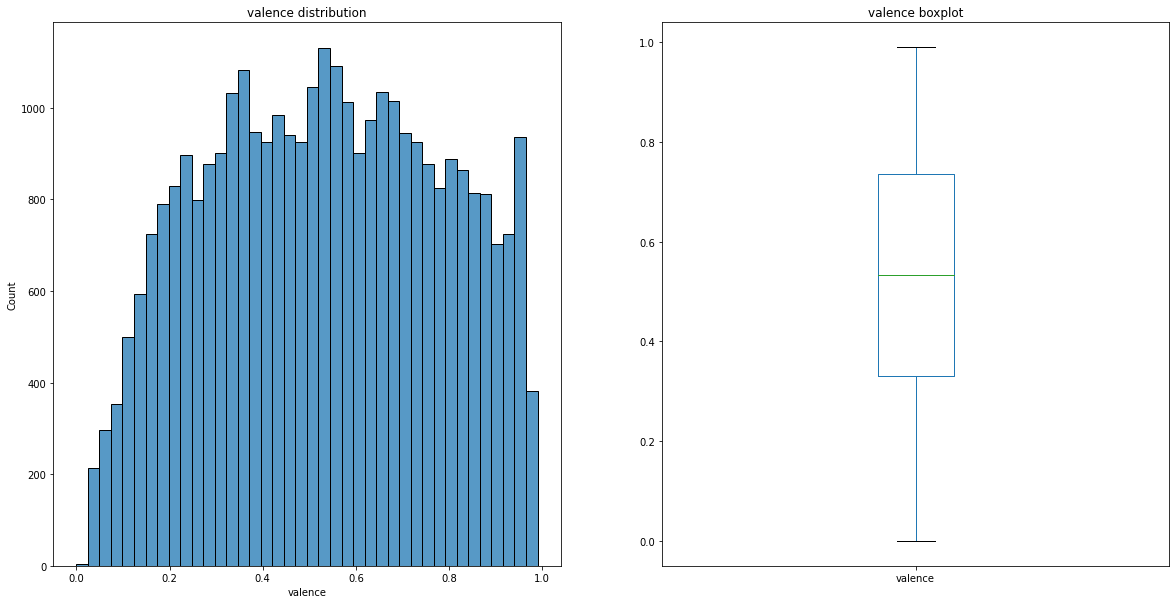

In [7]:
fig = plt.figure(figsize=(20, 10))
fig.add_subplot(1,2,1)
sns.histplot(db_eng['valence']);
plt.title('valence distribution')
fig.add_subplot(1,2,2)
db_eng['valence'].plot.box();
plt.title('valence boxplot');

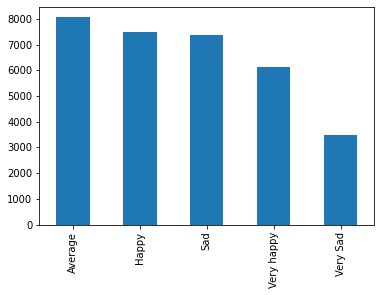

In [8]:
bins=[0,0.2,0.4,0.6,0.8]
group=['Very Sad','Sad','Average','Happy','Very happy']
db_eng['valence_bin']=pd.cut(db_eng['valence'],bins=5,labels=group,right=False)
db_eng['valence_bin'].value_counts().plot.bar();

In [9]:
db_eng=db_eng.head(10000)

In [10]:
sw2= open("stopword2.txt", "r",encoding='utf-8').read()
stop=[]
sw2= sw2.split()
for word in sw2:
    stop.append(word)

In [25]:
# library to clean data 
import re 
# Natural Language Tool Kit 
import nltk 
nltk.download('stopwords') 

# to remove stopword 
from nltk.corpus import stopwords 

nltk_stopwords= stopwords.words("english")
custom_stopwords=['aa', 'aaaaaaaaah', 'aaaah', 'aaah', 'aahh',"aaa", "aah", "ab", "ah", "aha", "ahh", "ahhh", "ba","yup", "yuh",
                  "yo", "ye", "yi","yeah", "yeh", "yay", "yea", "yah", "yap", "ya", "wow", "woo", "wop", "woh",
                  "woe", "woah", "wo", "whoa", "whoo", "whoop", "umm", "um", "uhn", "uh", "uhh","weep", "voodoo", "wa", "wah", 
                  "waltz", "vers", "tha", "th", "thee",'hey', 'hi', 'hm', 'hmm', 'hmmm', 'ho','mm', 'mma', 'mmh', 'mmm', 'mmmm',
                  'mmmmm', 'mmmmmm', 'mo', 'oo', 'oogi', 'ooh', 'oohh', 'oohhh', 'ooho', 'oom', 'ooo', 'oooh', 'ooohh', 'oooo', 
                  'ooooh', 'ooooo', 'oooooh', 'oooooo', 'ooooooh', 'oop', 'aaaaaaa', 'aaaaaaaaaaah', 'aaaaaaaaaahhhhhhhhhh',
                  'aaaaaaaah', 'aaaaaaah', 'aaaaaaaw', 'aaaaaah', 'aaaaaahhhh', 'aaaaah', 'aaaahhh', 'aaaahhhhhhhhhh',
                  'aaahh', 'aaahhh', 'aaf', 'aahhhh', 'aaliyah', 'aalso', 'aaow', 'aaron', 'aarrrhhhh', 'aaww', 'aay',
                 'abc', 'abcd','awf', 'awftah', 'awg', 'awh', 'awhh', 'awhil', 'awkward', 'awn', 'awok', 'awoken', 'awooo',
                  'awop', 'awright', 'aww', 'awww', 'awwww', 'awwwwuhhhhh', 'awwwww', 'ax', 'axe', 'axi', 'axl', 'axton', 'ay',
                  'aya', 'ayanday', 'ayatolah', 'ayatollah', 'aye', 'ayeoh', 'ayeza', 'ayi', 'aynsley', 'ayo', 'ayou', 'ayyaahhyy',
                  'ayyo', 'ayyy', 'ayyyyy', 'ayyyyyyy', 'az', 'azalea', 'aztec', 'azul', 'azz', 'baa', 'baaaaaaaabi', 'baaaay',
                  'baaabi', 'baabi', 'baam', 'bab', 'baba', 'babababay', 'babaloo', 'babbag', 'babbl', 'babblin', 'babe', 'babel',
                  'babetel', 'babi', 'babia', 'babin', 'baboon', 'babooshka', 'babooski', 'baboso', 'babydo', 'babydol',
                 'err', 'errand', 'errat', 'errol', 'erron', 'error', 'errrrrrrr', 'ew', 'ewedihalehu', 'ewww', 'ewwww',
                 'haffa', 'haffi', 'hafta', 'hag', 'hagar', 'haggard', 'hah', 'haha', 'hahah', 'hahaha', 'hahahaaaaaa', 'hahahaha',
                  'hahahahaha', 'hahahahahahaha', 'hahahahahahahaha', 'hahahahh', 'hahahahhaha', 'hahh', 'hahhh', 'hahn',
                 'ihe', 'ii', 'iif', 'iii', 'iiii', 'iiiiii', 'iiiiiiiieeeeeee', 'iiiiiiiiiiiiiii', 'iiiiiiiiiiit', 'iinto',
                  'iit', 'ikanipo', 'ike', 'ikeona', 'iksrfo', 'il', 'iliysk',
                 'isham', 'isi', 'isl', 'isla', 'island', 'isley', 'ism', 'ismith', 'isnt', 'isol', 'isoton', 'israel', 'iss',
                  'issa', 'issu', 'ist', 'istanbul', 'isuzu', 'isuzus', 'ital', 'itali', 'italian', 'italiano', 'italianoooooo',
                  'itch', 'itchi', 'itchin', 'ite', 'item', 'itll', 'ito', 'itss', 'itti', 'itv', 'ityou', 'iud', 'iv', 'ivan',
                  'ivanho', 'ivanovich', 'ive', 'iverson', 'ivi', 'ivori', 'iwa', 'iwhen', 'iwil',
                  'iwis', 'iwish', 'iwo', 'iyah', 'iz', 'izm', 'izvestia', 'izz', 'izzal', 'izzi', 'izzin', 'izzo', 'ja', 'jab',
                 'johnson', 'johnsonadminist', 'johnsonvill', 'johnston','loooong', 'loooooos', 'looooovepow', 'loooos', 'loooov', 'looov',
                 'youtub', 'youuuu', 'youuuuuuuuuu', 'youv', 'youyou', 'yow', 'yoyoyo', 'yoz', 'ypu', 'yrold', 'ys', 'ything', 'yu', 'yuck',
                  'yucki', 'yugoslavia', 'yuk', 'yukon', 'yul', 'yule', 'yuletid', 'yum', 'yumm', 'yummi', 'yummier', 'yung', 
                  'yungbuck', 'yungstar', 'yuppi', 'yusef', 'yves', 'yvonn', 'yyou', 'zaakir', 'zachari', 'zack', 'zaddi', 'zag',
                  'zaga', 'zai', 'zair', 'zambia', 'zandt', 'zani', 'zaniest', 'zankou', 'zannotti', 'zanzibar', 'zanzing', 'zap',
                  'zapato', 'zappa', 'zapper', 'zaza', 'ze', 'zeal', 'zealand', 'zealot', 'zealous', 'zebra', 'zee', 'zeebuhla',
                  'zeke', 'zekley', 'zen', 'zephanyl', 'zephryus', 'zephyr', 'zero', 'zest', 'zestin', 'zev', 'zig', 'zigazig',
                  'zigga', 'ziggi', 'zillion', 'zillionair', 'zim', 'zimbabw', 'zimmerman', 'zimmi', 'zina', 'zine', 'zing',
                  'zinger', 'zion', 'zip', 'ziplock', 'zippedi', 'zipper', 'zircon', 'zirconium', 'zit', 'ziwiski', 'zo', 'zod',
                  'zodiac', 'zoe', 'zoink', 'zoma', 'zomba', 'zombi', 'zone', 'zong', 'zonin', 'zoo', 'zooki', 'zoom', 'zoomin',
                  'zoop', 'zoot', 'zooti', 'zoovier', 'zoowap', 'zorro', 'zsa', 'zu', 'zucchini', 'zuider', 'zuleyma', 'zulu',
                  'zum', 'zwei', 'zy', 'zydeco', 'zz','woo', 'wooaah', 'wooaahh', 'wooah', 'wooba', 'wood',
                  'woodbin', 'wooden', 'woodgrain', 'woodi', 'woodland', 'woodsh', 'woodsmok', 'woodstock',
                  'woodwork', 'woof', 'woofer', 'woofin', 'woog', 'woogi', 'wooh', 'woohhh', 'woohoo', 'woohoohoo',
                  'wooki', 'wool', 'woolen', 'wooler', 'wooleri', 'woolfson', 'wooli', 'woolli', 'woolworth',
                  'woomp', 'wooo', 'woooh', 'woooo', 'wooooah', 'wooooo', 'woooooaaaah', 'woooooah', 'woooooo',
                  'wooooooh', 'wooooooo', 'woooooooooh', 'woooorrrrkkoouut', 'woooow', 'woop', 'woozi', 'woq',
                 'wowi', 'wowow', 'wowowoh', 'wowowowow', 'wowowowowowo', 'woy', 'woyi', 'woz',
                 'vv', 'vvhi', 'vvs', 'vw', 'waaaaaaaaaaaaaaaaaaaah', 'waaaaaaaaaah', 'waaav', 'waait', 'waan',
                  'wabash', 'wabasha', 'wabo', 'wac', 'wack', 'vrai', 'vrinnn', 'vro', 'vroom', 'vrrrroom', 'vu', 'vuelv',
                 'uuh', 'uuhh', 'uum', 'uummm', 'uuooooooooh', 'uuu', 'uuuh', 'uuuoooooooooooh', 'uuuun', 'uuuuuuum', 'uy',
                  'uzi', 'va']

custom_stopwords2=["also", "another", "arrive", "appear", "your", "zoom", "zoo", "yet", "yesterday", "today", "yes",
                  "year", "wont", "william", "whether", "wherever", "whenever", "whatever", "what",
                  "hundred", "thousand", "whatch", "went", "saturday", "sunday", "monday", "tuesday", "wednesday",
                  "thursday", "friday", "want", "wanna", "walk", "view", "video", "us", "upon", "unless", "understand",
                  "understood", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten", "eleven",
                  "twelve", "thirteen", "fourteen", "fifteen", "sixteen", "seventeen", "eighteen", "ninteen", "twenty",
                  "twenti", "thirty", "thirti", "fourty", "fourti", "fifty", "fifti", "sixty", "sixti", "seventy",
                  "seveti", "eighty", "eighti", "ninety", "nineti", "hundred", "thousand", "first", "second", "third",
                  "twice", "turn", "thing", "tv", "this", "that"]
all_stopwords=nltk_stopwords+custom_stopwords+custom_stopwords2 + stop


# for Stemming in Italiano con Snowball
from nltk.stem import SnowballStemmer 
stemmer_eng = SnowballStemmer('english')

# Initialize empty array 
# to append clean text 
corpus = [] 
# 1517 (reviews) rows to clean 
for i in db_eng.index: 
	
	# column : "Review", row ith 
	review = re.sub('[^a-zA-Z]', ' ', db_eng['testo'][i])
	#print(i)
	# convert all cases to lower cases 
	review = review.lower() 
	
	# split to array(default delimiter is " ") 
	review = review.split() 
	
	# loop for stemming each word 
	# in string array at ith row	 
	review = [stemmer_eng.stem(word) for word in review 
				if not word in set(all_stopwords)] 
				
	# rejoin all string array elements 
	# to create back into a string 
	review = ' '.join(review) 
	
	# append each string to create 
	# array of clean text 
	corpus.append(review) 
#with open('corpus.txt', 'w') as f:
  #  f.write(str(corpus))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chegu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
#db_eng.to_csv('db_eng.csv')

In [26]:
# Creating the Bag of Words model 
from sklearn.feature_extraction.text import CountVectorizer 

# To extract max 1500 feature. 
# "max_features" is attribute to 
# experiment with to get better results 
cv = CountVectorizer() 

# X contains corpus (dependent variable) 
X = cv.fit_transform(corpus).toarray() 

# y contains answers if review 
# is positive or negative 
y = db_eng['valence_bin'].values
print(len(cv.get_feature_names()))
print(cv.get_feature_names())
print(X[0])
print(y)

22739
['abacin', 'abandon', 'abba', 'abbey', 'abbi', 'abbot', 'abc', 'abcd', 'abcess', 'abdomen', 'abduct', 'abdul', 'abe', 'abel', 'abercrombi', 'abi', 'abib', 'abid', 'abigail', 'abil', 'abilen', 'abla', 'ablaz', 'ablowin', 'abner', 'aboard', 'abod', 'abolish', 'abomin', 'abort', 'abound', 'abracadabra', 'abraham', 'abrand', 'abraz', 'abrupt', 'absalom', 'absenc', 'absent', 'absentmind', 'absolut', 'absorb', 'abstract', 'absurd', 'abu', 'abuela', 'abund', 'abus', 'abusin', 'abysm', 'abyss', 'abyssinia', 'abyssinian', 'ac', 'academi', 'acajou', 'acapella', 'acapulco', 'acariciando', 'accecpt', 'acceler', 'accent', 'accentu', 'accept', 'access', 'accessor', 'accessori', 'accid', 'accident', 'acclaim', 'acclam', 'accolad', 'accomid', 'accommod', 'accomp', 'accompani', 'accomplic', 'accomplish', 'accord', 'account', 'accountin', 'accroch', 'accross', 'accumul', 'accupunctur', 'accur', 'accus', 'accuss', 'accustom', 'ace', 'acetylen', 'ach', 'acheiv', 'achi', 'achiev', 'achill', 'achin', 

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
obj = TfidfVectorizer()

X = obj.fit_transform(corpus)


# Split

In [30]:
from sklearn.model_selection import train_test_split 

# experiment with "test_size" 
# to get better results 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 

# 1) Random Forest

In [31]:
numbers=[200,500, 1000]
y_pred=[]
for number in numbers:
    model = RandomForestClassifier(n_estimators = number,criterion = 'entropy') 
    model.fit(X_train, y_train) 
    y_pred.append(model.predict(X_test))
    

In [32]:

fig = make_subplots(rows=2, cols=3, specs=[[{},{},{}],
           [{"colspan": 3}, None,None]],start_cell="top-left",shared_yaxes='rows',
                    subplot_titles=['200 estimators','500 estimators','1000 estimators','f1 score'])

for n in range(3):
    cm = confusion_matrix(y_test, y_pred[n]) 
    fig.add_trace(go.Heatmap(z=cm.tolist(),x=group,y=group, coloraxis="coloraxis"),row=1, col=n+1)
y_vec=[metrics.f1_score(y_test, y_pred[n],average='weighted') for n in range(3)]
fig.update_layout(coloraxis=dict(colorscale='Blues'))
fig.add_trace(go.Scatter(x=[200,500,1000],y=y_vec),row=2, col=1)
fig.update_layout(title_text="Random forest")  

fig.show()

# 2) Neural Network

In [36]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, random_state=1,max_iter=1000)
clf.fit(X_train, y_train)

y_pred= clf.predict(X_test)
y_pred

array(['Sad', 'Happy', 'Sad', ..., 'Sad', 'Happy', 'Average'],
      dtype='<U10')

In [37]:
cm = confusion_matrix(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

     Average       0.26      0.25      0.25       609
       Happy       0.28      0.29      0.29       608
         Sad       0.25      0.26      0.26       510
    Very Sad       0.22      0.24      0.23       237
  Very happy       0.34      0.31      0.32       536

    accuracy                           0.27      2500
   macro avg       0.27      0.27      0.27      2500
weighted avg       0.28      0.27      0.28      2500

[[153 145 142  63 106]
 [148 178 122  39 121]
 [129 109 134  68  70]
 [ 42  49  62  56  28]
 [127 146  66  31 166]]


# 3) Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

# 4) KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier

f1score=[]
for k in range(20):
    knn=KNeighborsClassifier(n_neighbors=k+1, metric="minkowski")
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    f1score.append(metrics.f1_score(y_test, y_pred,average='weighted'))

In [40]:
cm = confusion_matrix(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

     Average       0.24      0.27      0.25       609
       Happy       0.25      0.24      0.24       608
         Sad       0.25      0.25      0.25       510
    Very Sad       0.19      0.04      0.07       237
  Very happy       0.30      0.38      0.34       536

    accuracy                           0.26      2500
   macro avg       0.25      0.24      0.23      2500
weighted avg       0.25      0.26      0.25      2500

[[163 133 138  18 157]
 [180 144 111   4 169]
 [154 111 128  14 103]
 [ 65  54  69  10  39]
 [125 132  69   6 204]]


In [41]:
fig = go.Figure(data=go.Scatter(x=list(range(20)), y=f1score, mode='markers+lines'))
fig.update_layout(title='KNN F1 score')
fig.show()